     Tanggal         Nama Customer                        Lokasi Customer  \
0 2018-01-01  TOA GALVA INDUSTRIES  -6.398580325820022, 106.8648544138663   
1 2018-01-01  TOA GALVA INDUSTRIES  -6.398580325820022, 106.8648544138663   
2 2018-01-01  TOA GALVA INDUSTRIES  -6.398580325820022, 106.8648544138663   
3 2018-01-01  TOA GALVA INDUSTRIES  -6.398580325820022, 106.8648544138663   
4 2018-01-01  TOA GALVA INDUSTRIES  -6.398580325820022, 106.8648544138663   

            Nama Produk  Type Produk       SO  TERKIRIM SISA PO INTERNAL  \
0          FIXING SCREW  Accessories  31500.0   31500.0       0        -   
1       BS-1020 BRACKET  Accessories  14900.0   13600.0    1300        -   
2  HX-SW HANDLE BRACKET  Accessories    250.0     250.0       0        -   
3          TC-303 ANGLE  Accessories  29000.0   16390.0   12610        -   
4          TC-615 ANGLE  Accessories   1650.0    1650.0       0        -   

  EKSTERNAL  Harga Komoditas Bijih Besi Indeks Produksi Dalam Negeri  \
0       

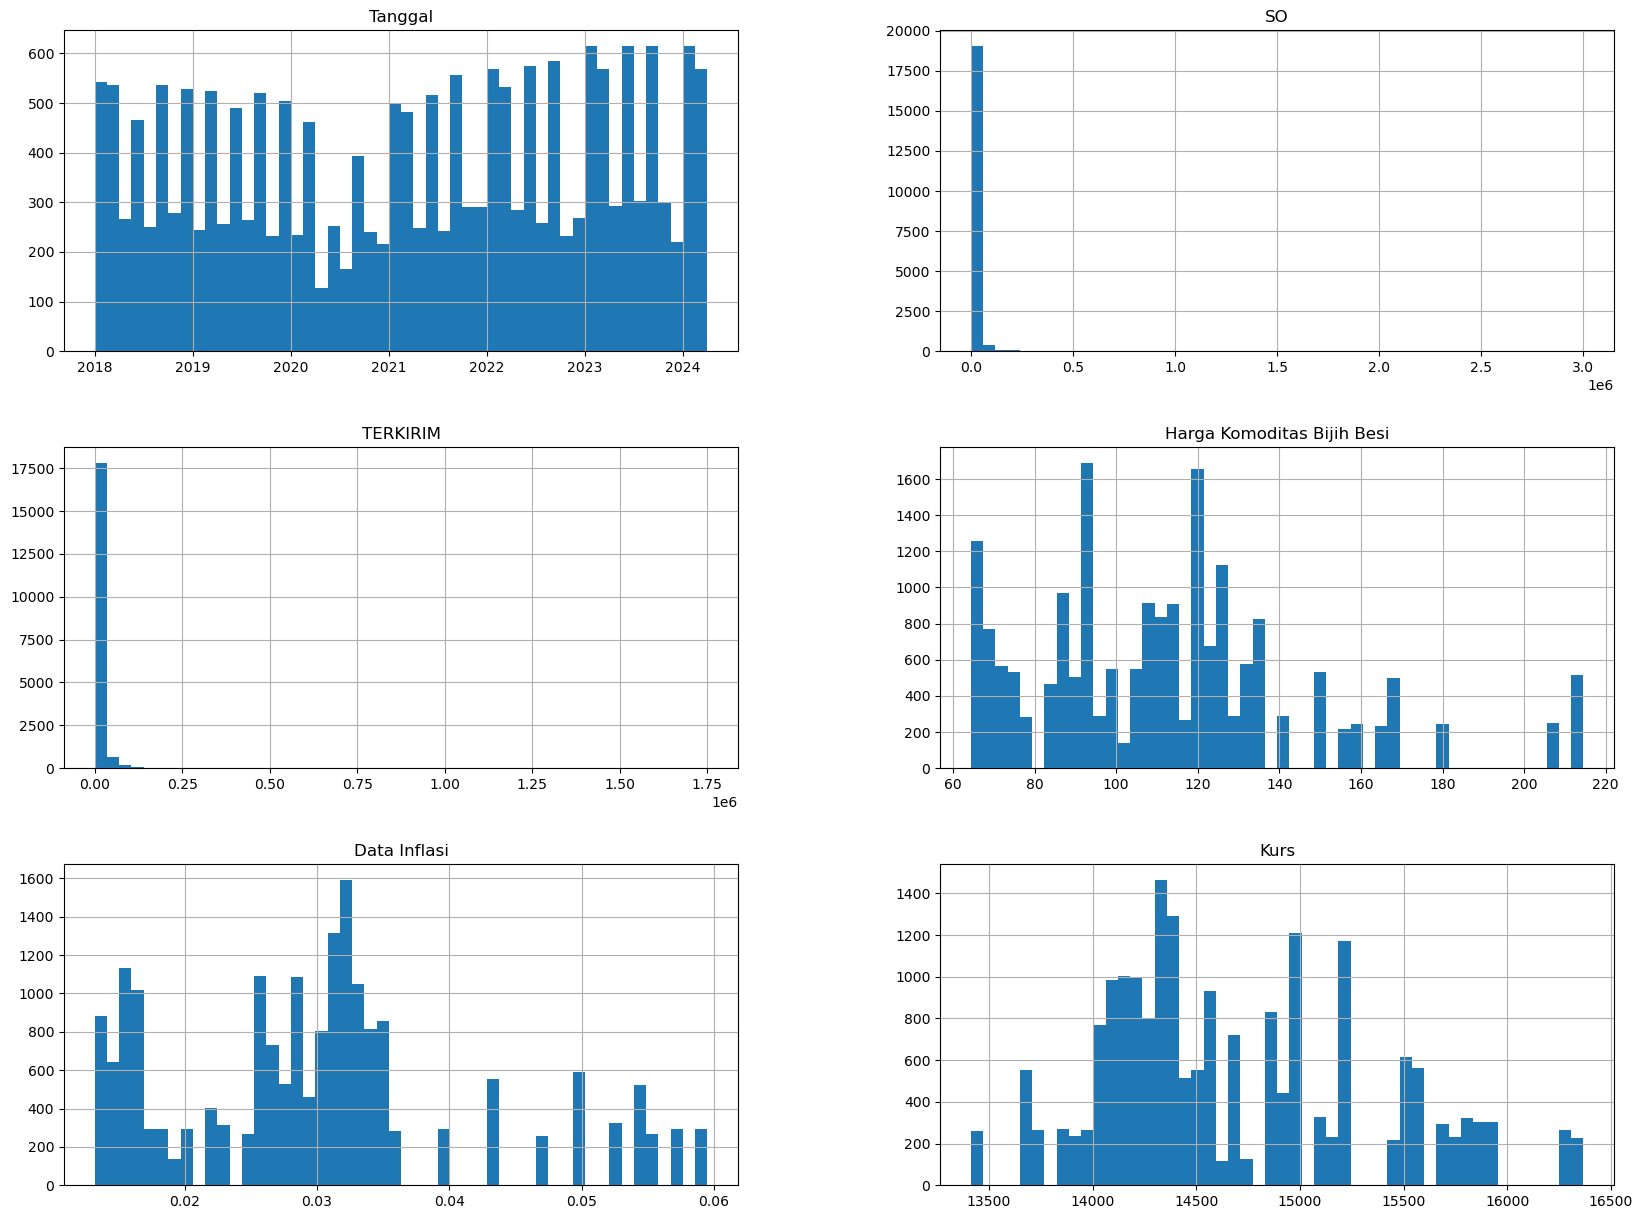

C:\Users\chris\AppData\Local\Temp\ipykernel_10932\3053055615.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['Tanggal'] = pd.to_datetime(data_filtered['Tanggal'])
C:\Users\chris\AppData\Local\Temp\ipykernel_10932\3053055615.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['Indeks Produksi'] = pd.to_numeric(data_filtered['Indeks Produksi'], errors='coerce')
C:\Users\chris\AppData\Local\Temp\ipykernel_10932\3053055615.py:35: SettingWithCopyWarning: 
A value is trying to be

   bulan_tahun         SO
0      2018-01  2845126.0
1      2018-02  2751060.0
2      2018-03  3751325.0
3      2018-04  3350350.0
4      2018-05  2733224.0
..         ...        ...
71     2023-12  2022755.0
72     2024-01  2847896.0
73     2024-02  2730829.0
74     2024-03  2765759.0
75     2024-04  2020844.0

[76 rows x 2 columns]
   bulan_tahun         SO  SES Forecast         Error           MAD  \
0      2018-01  2845126.0  2.845126e+06           NaN           NaN   
1      2018-02  2751060.0  2.845126e+06 -9.406600e+04  9.406600e+04   
2      2018-03  3751325.0  2.835719e+06  9.156056e+05  9.156056e+05   
3      2018-04  3350350.0  2.927280e+06  4.230700e+05  4.230700e+05   
4      2018-05  2733224.0  2.969587e+06 -2.363630e+05  2.363630e+05   
..         ...        ...           ...           ...           ...   
83     2024-11        0.0  1.262952e+06 -1.262952e+06  1.262952e+06   
84     2024-12        0.0  1.136657e+06 -1.136657e+06  1.136657e+06   
85     2025-01        0.0 

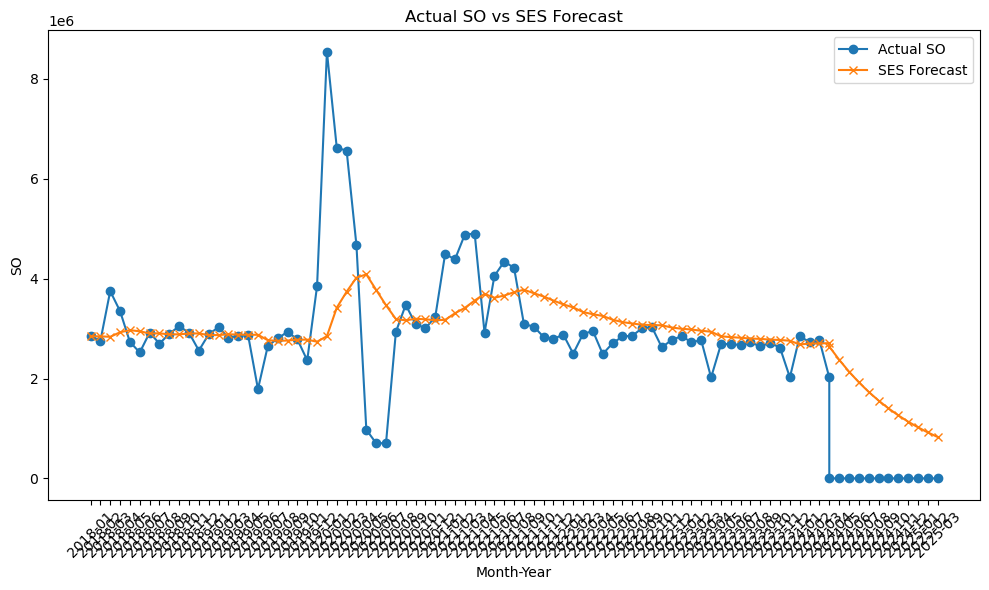

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_excel('../data.xlsx', sheet_name='Rekapan')

# Muncul data awal dan akhir
print(df.head())
print(df.tail())

# Statistik deskriptif dasar
print(df.describe())

# Cek nilai yang hilang
print(df.isnull().sum())

# Visualisasi distribusi data
df.hist(bins=50, figsize=(20, 15))
plt.show()

# Filter kolom terkait
data_filtered = df[['Tanggal', 'SO', 'TERKIRIM', 'Harga Komoditas Bijih Besi', 'Indeks Produksi Dalam Negeri', 'Data Inflasi', 'Kurs']]

# Ganti nama kolom
data_filtered.columns = ['Tanggal', 'SO', 'Terkirim', 'Harga Komoditas', 'Indeks Produksi', 'Data Inflasi', 'Kurs']

# Konversi tipe data
data_filtered['Tanggal'] = pd.to_datetime(data_filtered['Tanggal'])

# Ganti tipe data 'Indeks Produksi'
data_filtered['Indeks Produksi'] = pd.to_numeric(data_filtered['Indeks Produksi'], errors='coerce')

# Buat kolom 'bulan_tahun'
data_filtered['bulan_tahun'] = data_filtered['Tanggal'].dt.to_period('M')

# Rekapan Bulanan
monthly_summary = data_filtered.groupby('bulan_tahun').agg({
    'SO': 'sum',
    # Uncomment other columns as needed
    # 'Terkirim': 'sum',
    # 'Harga Komoditas': 'mean',
    # 'Indeks Produksi': 'mean',
    # 'Data Inflasi': 'mean',
    # 'Kurs': 'mean'
}).reset_index()

# Muncul Rekapan Bulanan
print(monthly_summary)

# Set alpha value for SES
alpha = 0.1

# Initialize columns for SES forecast and error metrics
monthly_summary['SES Forecast'] = np.nan
monthly_summary['Error'] = np.nan
monthly_summary['MAD'] = np.nan
monthly_summary['MSE'] = np.nan
monthly_summary['MAPE'] = np.nan

# Set initial forecast to the first SO value
monthly_summary.loc[0, 'SES Forecast'] = monthly_summary.loc[0, 'SO']

# Apply SES formula and calculate error metrics for each subsequent row
for i in range(1, len(monthly_summary)):
    # SES Forecast
    monthly_summary.loc[i, 'SES Forecast'] = (alpha * monthly_summary.loc[i-1, 'SO']) + ((1 - alpha) * monthly_summary.loc[i-1, 'SES Forecast'])
    
    # Error
    monthly_summary.loc[i, 'Error'] = monthly_summary.loc[i, 'SO'] - monthly_summary.loc[i, 'SES Forecast']
    
    # MAD (Mean Absolute Deviation)
    monthly_summary.loc[i, 'MAD'] = abs(monthly_summary.loc[i, 'Error'])
    
    # MSE (Mean Squared Error)
    monthly_summary.loc[i, 'MSE'] = monthly_summary.loc[i, 'Error'] ** 2
    
    # MAPE (Mean Absolute Percentage Error)
    if monthly_summary.loc[i, 'SO'] != 0:
        monthly_summary.loc[i, 'MAPE'] = (abs(monthly_summary.loc[i, 'Error']) / monthly_summary.loc[i, 'SO']) * 100
    else:
        monthly_summary.loc[i, 'MAPE'] = np.nan

# Buat data dummy SO bernilai 0 selama 12 bulan ke depan
months_to_forecast = 12
dummy_data = pd.DataFrame({
    'bulan_tahun': pd.date_range(start=monthly_summary['bulan_tahun'].max().to_timestamp(), periods=months_to_forecast, freq='M').to_period('M'),
    'SO': np.zeros(months_to_forecast)
})

# Gabungkan dengan data asli
extended_data = pd.concat([monthly_summary[['bulan_tahun', 'SO']], dummy_data], ignore_index=True)

# Initialize columns for SES forecast and error metrics in the extended data
extended_data['SES Forecast'] = np.nan
extended_data['Error'] = np.nan
extended_data['MAD'] = np.nan
extended_data['MSE'] = np.nan
extended_data['MAPE'] = np.nan

# Set initial forecast to the first SO value (from original data)
extended_data.loc[0, 'SES Forecast'] = extended_data.loc[0, 'SO']

# Apply SES formula to the extended dataset
for i in range(1, len(extended_data)):
    # SES Forecast
    extended_data.loc[i, 'SES Forecast'] = (alpha * extended_data.loc[i-1, 'SO']) + ((1 - alpha) * extended_data.loc[i-1, 'SES Forecast'])
    
    # Error
    extended_data.loc[i, 'Error'] = extended_data.loc[i, 'SO'] - extended_data.loc[i, 'SES Forecast']
    
    # MAD (Mean Absolute Deviation)
    extended_data.loc[i, 'MAD'] = abs(extended_data.loc[i, 'Error'])
    
    # MSE (Mean Squared Error)
    extended_data.loc[i, 'MSE'] = extended_data.loc[i, 'Error'] ** 2
    
    # MAPE (Mean Absolute Percentage Error)
    if extended_data.loc[i, 'SO'] != 0:
        extended_data.loc[i, 'MAPE'] = (abs(extended_data.loc[i, 'Error']) / extended_data.loc[i, 'SO']) * 100
    else:
        extended_data.loc[i, 'MAPE'] = np.nan

# Show the result
print(extended_data)

# Optional: Plot the actual vs forecasted values
plt.figure(figsize=(10, 6))
plt.plot(extended_data['bulan_tahun'].astype(str), extended_data['SO'], label='Actual SO', marker='o')
plt.plot(extended_data['bulan_tahun'].astype(str), extended_data['SES Forecast'], label='SES Forecast', marker='x')
plt.xlabel('Month-Year')
plt.ylabel('SO')
plt.xticks(rotation=45)
plt.title('Actual SO vs SES Forecast')
plt.legend()
plt.tight_layout()
plt.show()
